(2, 4)

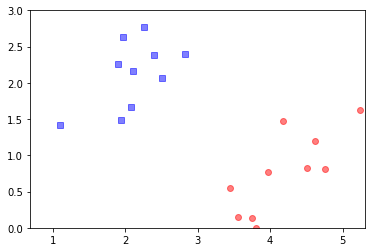

In [129]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(41) # oblige, if there's not seed, each time we run, it'll give a different random
means = [[2, 2], [4,1]]
cov = [[.3, .2], [.2, .3]]
N = 10 
X0 = np.random.multivariate_normal(means[0], cov, N) # draw random sample from a multivariate normal distribution
# Tao ra gia tri ngau nhien dua tren phan phoi chuan nhieu chieu
X1 = np.random.multivariate_normal(means[1], cov, N)

# X1[-1, :] = [2.7, 2]
X = np.concatenate((X0.T, X1.T), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
plt.plot(X0[:, 0], X0[:, 1], 'bs', alpha = 0.5)
plt.plot(X1[:, 0], X1[:, 1], 'ro', alpha = 0.5)
plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)

## Solving by sklearn

In [131]:
X = np.vstack((X0, X1)) # vstack tuong tu ham reshape(-1,1)
y = np.vstack((np.ones((N,1 )), -np.ones((N,1 )))).reshape((2*N,))


In [132]:
from sklearn.svm import SVC
C = 100
clf = SVC(kernel = 'linear', C = C)
clf.fit(X, y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [133]:
w_sklearn = clf.coef_.reshape(-1,1)
b_sklearn = clf.intercept_[0]
print(w_sklearn, b_sklearn)

[[-0.95969125]
 [ 0.7573336 ]] 1.8926917787557869


# Check by line plot

In [134]:
x = np.arange(-10, 10, 0.1)
y = -w_sklearn[0]/w_sklearn[1]*x - b_sklearn/w_sklearn[1]

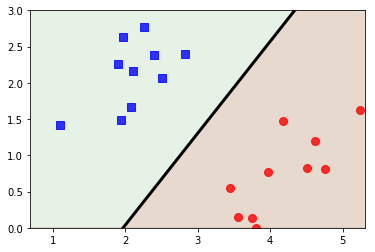

In [135]:
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
plt.plot(x, y, 'k', linewidth = 3)
plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)
# fill two* region
y2 = 50*x
plt.fill_between(x, y2, color = 'green', alpha=0.1)
plt.fill_between(x, y, color='red', alpha = 0.1)

## Test with oulier delection, soft-margin C is smaller

(2, 4)

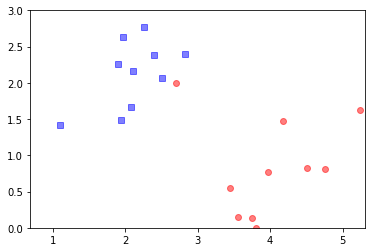

In [141]:
np.random.seed(41)
means = [[2, 2], [4,1]]
cov = [[.3, .2], [.2, .3]]
N = 10 
X0 = np.random.multivariate_normal(means[0], cov, N) # draw random sample from a multivariate normal distribution
# Tao ra gia tri ngau nhien dua tren phan phoi chuan nhieu chieu
X1 = np.random.multivariate_normal(means[1], cov, N)

X1[-1, :] = [2.7, 2]
X = np.concatenate((X0.T, X1.T), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
plt.plot(X0[:, 0], X0[:, 1], 'bs', alpha = 0.5)
plt.plot(X1[:, 0], X1[:, 1], 'ro', alpha = 0.5)
plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)

In [153]:
X = np.vstack((X0, X1)) # vstack tuong tu ham reshape(-1,1)
y = np.vstack((np.ones((N,1 )), -np.ones((N,1 )))).reshape((2*N,))
C = 50
clf = SVC(kernel = 'linear', C = C)
clf.fit(X, y)
x = np.arange(-10, 10, 0.1)
y = -w_sklearn[0]/w_sklearn[1]*x - b_sklearn/w_sklearn[1]

w = clf.coef_.reshape(-1,1)
b = clf.intercept_[0]
print(w, b)

[[-6.74669745]
 [ 6.44348787]] 4.58836698526304


In [154]:
x = np.arange(-10, 10, 0.1)
y = -w[0]/w[1]*x - b/w[1]

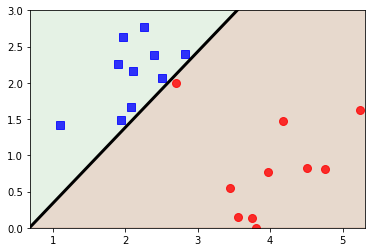

In [155]:
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
plt.plot(x, y, 'k', linewidth = 3)
plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)
# fill two* region
y2 = 50*x
plt.fill_between(x, y2, color = 'green', alpha=0.1)
plt.fill_between(x, y, color='red', alpha = 0.1)

## Other example:

(2, 4)

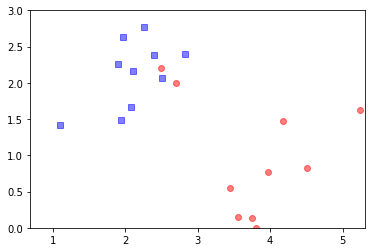

In [158]:
np.random.seed(41)
means = [[2, 2], [4,1]]
cov = [[.3, .2], [.2, .3]]
N = 10 
X0 = np.random.multivariate_normal(means[0], cov, N) # draw random sample from a multivariate normal distribution
# Tao ra gia tri ngau nhien dua tren phan phoi chuan nhieu chieu
X1 = np.random.multivariate_normal(means[1], cov, N)

X1[-1, :] = [2.7, 2]
X1[-2, :] = [2.5, 2.2]
X = np.concatenate((X0.T, X1.T), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
plt.plot(X0[:, 0], X0[:, 1], 'bs', alpha = 0.5)
plt.plot(X1[:, 0], X1[:, 1], 'ro', alpha = 0.5)
plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)

In [175]:
X = np.vstack((X0, X1)) # vstack tuong tu ham reshape(-1,1)
y = np.vstack((np.ones((N,1 )), -np.ones((N,1 )))).reshape((2*N,))
C = 3
clf = SVC(kernel = 'linear', C = C)
clf.fit(X, y)
x = np.arange(-10, 10, 0.1)
y = -w_sklearn[0]/w_sklearn[1]*x - b_sklearn/w_sklearn[1]

w1 = clf.coef_.reshape(-1,1)
b1 = clf.intercept_[0]
print(w1, b1)

[[-0.89377557]
 [ 0.8102086 ]] 1.5397681413961697


In [176]:
x = np.arange(-10, 10, 0.1)
y = -w1[0]/w1[1]*x - b1/w[1]

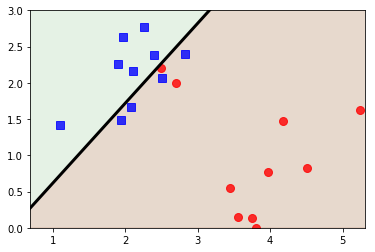

In [177]:
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
plt.plot(x, y, 'k', linewidth = 3)
plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)
# fill two* region
y2 = 50*x
plt.fill_between(x, y2, color = 'green', alpha=0.1)
plt.fill_between(x, y, color='red', alpha = 0.1)